# 0.0 Define independent inputs

In [1]:
POPULATION_SIZE = 38_268_000
NUMBER_OF_INFECTIONS = 237_178
P_LOSS_SMELL_GIVEN_COVID = 0.9
P_LOSS_SMELL = 0.01

# 0.1 Create a class, provide methods

In [2]:
class CovidReasoningBackwards:
    def __init__(self, n_infections: int, p_loss_smell: float, population: int, p_loss_smell_given_covid: float):
        """
        Constructor of the covid reasoning backward class.
        Args:
            n_infections (int): Number of infections in the population
            p_loss_smell (float): Probability of losing smell sense
            n_population (int): Number of hall population
            p_covid (float): Probability of covid
            p_loss_smell_given_covid (float): Probability of losing smell during Covid
        """
        self.n_infections = n_infections
        self.p_loss_smell = p_loss_smell
        self.n_population = population
        self.p_covid = self.n_infections / self.n_population
        self.p_loss_smell_given_covid = p_loss_smell_given_covid


    def calculate_conditional_probability(self, prob_a: float, prob_b: float, prob_b_given_a: float):
        """
        Calculates the conditional probability
        Args:
            prob_a (float): Probability of event A
            prob_b (float): Probability of event B
            prob_b_given_a (float): Probability of event B given the event A
        """
        return prob_b_given_a*prob_a/prob_b # p(A|B)

# 0.2 Create instance

In [3]:
covid = CovidReasoningBackwards(
    n_infections=NUMBER_OF_INFECTIONS,
    p_loss_smell=P_LOSS_SMELL,
    population=POPULATION_SIZE,
    p_loss_smell_given_covid=P_LOSS_SMELL_GIVEN_COVID
)

# Calculating of possibility of being infected under the condition of losing smell
p_covid_given_loss_smell = covid.calculate_conditional_probability(
    prob_a=covid.p_covid,
    prob_b=covid.p_loss_smell,
    prob_b_given_a=covid.p_loss_smell_given_covid)

print(f"Chance of being infected COVID under the condition of losing smell is equal:{p_covid_given_loss_smell:.3f}")

Chance of being infected COVID under the condition of losing smell is equal:0.558


Reasoning backwards
What if loss of smell was a very common complaint?


In [4]:
P_LOSS_SMELL = 0.1

covid = CovidReasoningBackwards(
    NUMBER_OF_INFECTIONS,
    P_LOSS_SMELL,
    POPULATION_SIZE,
    P_LOSS_SMELL_GIVEN_COVID
)

# Calculating of possibility of being infected under the condition of losing smell
p_covid_given_loss_smell = covid.calculate_conditional_probability(
    covid.p_covid,
    covid.p_loss_smell,
    covid.p_loss_smell_given_covid)

print(f"Chance of being infected COVID under the condition of losing smell is equal:{p_covid_given_loss_smell:.3f}")

Chance of being infected COVID under the condition of losing smell is equal:0.056


What if loss of smell was present only rarely during COVID-19 infection?

In [5]:
P_LOSS_SMELL = 0.01
P_LOSS_SMELL_GIVEN_COVID = 0.1

covid = CovidReasoningBackwards(
    NUMBER_OF_INFECTIONS,
    P_LOSS_SMELL,
    POPULATION_SIZE,
    P_LOSS_SMELL_GIVEN_COVID
)

# Calculating of possibility of being infected under the condition of losing smell
p_covid_given_loss_smell = covid.calculate_conditional_probability(
    covid.p_covid,
    covid.p_loss_smell,
    covid.p_loss_smell_given_covid)

print(f"Chance of being infected under the condition of losing smell is equal:{p_covid_given_loss_smell:.3f}")

Chance of being infected under the condition of losing smell is equal:0.062


# 0.3 Test the class

In [6]:
covid = CovidReasoningBackwards(
    NUMBER_OF_INFECTIONS,
    P_LOSS_SMELL,
    POPULATION_SIZE,
    P_LOSS_SMELL_GIVEN_COVID
)

covid.p_covid = 0.2
covid.p_loss_smell = 0.001
covid.p_loss_smell_given_covid = 0.01

# Calculating of possibility of being infected under the condition of losing smell
p_covid_given_loss_smell = covid.calculate_conditional_probability(
    covid.p_covid,
    covid.p_loss_smell,
    covid.p_loss_smell_given_covid)

print(f"Chance of being infected under the condition of losing smell is equal:{p_covid_given_loss_smell:.3f}")

Chance of being infected under the condition of losing smell is equal:2.000


What is wrong with data? We gave some wrong data to the model. Why? Chance of losing smell (for any reason) is equal = 0.001 so the probability of losing smell from
specific cause (COVID) can't be greater than the probability of losing your smell from all possible causes combined. Lets use Law of Total Probability


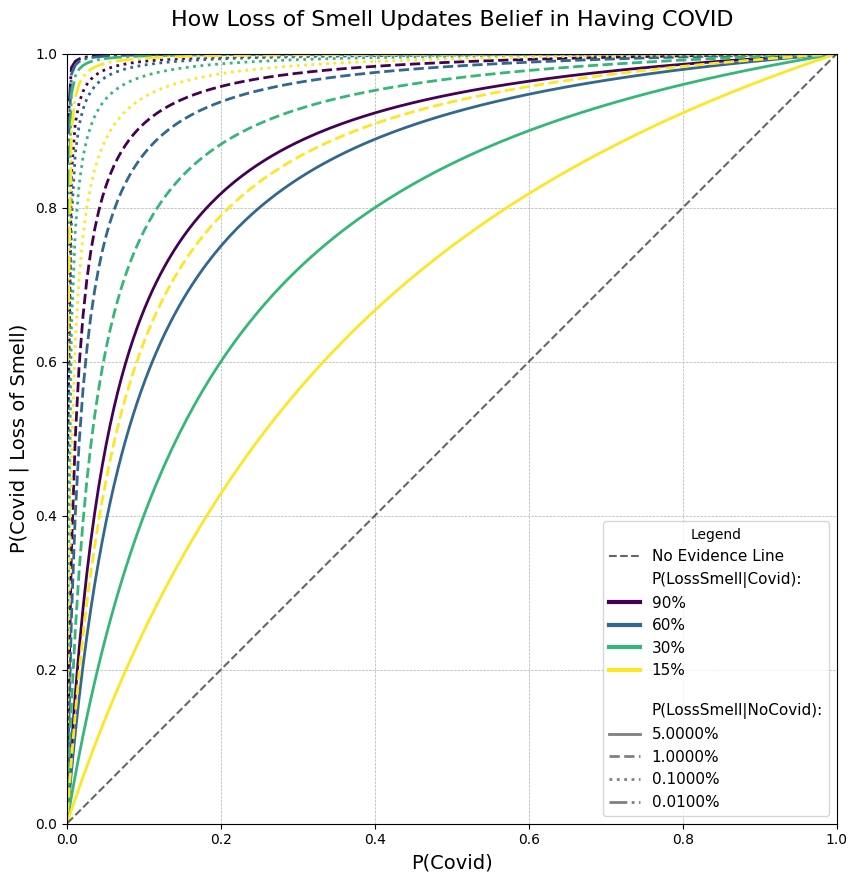

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D


def calculate_covid_chance_given_smell_loss(p_covid: float, p_loss_smell_given_covid: float, p_loss_smell_given_no_covid: float) -> float:
    """
    Calculates the covid chance given smell loss using Bayes Theorem and the Law of Total Probability.

    Args:
        p_covid (float): Prior probability of having COVID.
        p_loss_smell_given_covid (float): Probability of losing smell given COVID (sensitivity).
        p_loss_smell_given_no_covid (float): Probability of losing smell without COVID (1 - specificity).
    Returns:
        float: The posterior probability of having COVID given smell loss.
    """
    # P(not Covid)
    p_no_covid = 1 - p_covid

    # Law of Total Probability for P(LossSmell)
    # P(B) = P(B|A)*P(A) + P(B|~A)*P(~A)
    p_loss_smell_total = (p_loss_smell_given_covid * p_covid) + (p_loss_smell_given_no_covid * p_no_covid)

    if p_loss_smell_total == 0:
        return 0

    # Bayes Theorem: P(A|B) = (P(B|A) * P(A)) / P(B)
    p_covid_given_loss_smell = (p_loss_smell_given_covid * p_covid) / p_loss_smell_total

    return p_covid_given_loss_smell


# X-axis: Probability of having COVID in the population
p_covid_range = np.linspace(0.001, 0.999, 200)

# This variable show how strongly is the symptom linked to the disease
p_loss_smell_given_covid_args = [0.9, 0.6, 0.3, 0.15]

# This variable show  how common is the symptom in healthy people?
p_loss_smell_given_no_covid_args = [0.05, 0.01, 0.001, 0.0001]

fig, ax = plt.subplots(figsize=(14, 10))


colors = plt.cm.viridis(np.linspace(0, 1, len(p_loss_smell_given_covid_args)))
linestyles = ['-', '--', ':', '-.']

for i, p_ls_covid in enumerate(p_loss_smell_given_covid_args):
    for j, p_ls_no_covid in enumerate(p_loss_smell_given_no_covid_args):

        # Calculate the posterior probability for the entire range of p_covid
        posterior_probabilities = [
            calculate_covid_chance_given_smell_loss(pc, p_ls_covid, p_ls_no_covid)
            for pc in p_covid_range
        ]

        ax.plot(p_covid_range, posterior_probabilities,
                color=colors[i],
                linestyle=linestyles[j],
                linewidth=2)


# Add the y=x reference line
ax.plot(p_covid_range, p_covid_range, 'k--', alpha=0.6, label='No Evidence (Posterior = Prior)')
ax.set_xlabel("P(Covid)", fontsize=14)
ax.set_ylabel("P(Covid | Loss of Smell)", fontsize=14)
ax.set_title("How Loss of Smell Updates Belief in Having COVID", fontsize=16, pad=20)



legend_elements = [Line2D([0], [0], color='k', ls='--', alpha=0.6, label='No Evidence Line')]
legend_elements.append(Line2D([0], [0], marker='s', color='w', label='P(LossSmell|Covid):', markerfacecolor='k', markersize=0))
for i, val in enumerate(p_loss_smell_given_covid_args):
    legend_elements.append(Line2D([0], [0], color=colors[i], lw=3, label=f'{int(val*100)}%'))

legend_elements.append(Line2D([0], [0], marker='s', color='w', label='\nP(LossSmell|NoCovid):', markerfacecolor='k', markersize=0))
for j, val in enumerate(p_loss_smell_given_no_covid_args):
    legend_elements.append(Line2D([0], [0], color='gray', ls=linestyles[j], lw=2, label=f'{val*100:.4f}%'))

ax.legend(handles=legend_elements, loc='lower right', fontsize=11, title="Legend")
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_aspect('equal', adjustable='box')

plt.show()

# 0.4 Interpretation

y=x This line give me zero new information observing the symptom
The worst cases are when losing smell is a popular symptom
the higher losing smell correlates with covid then we have higher probability of covid occur


